In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

## Dataset #1: User Review Data

This dataset contains the number of reviews for 5 users in 6 different categories of destinations in South India. <br>
The six categories of destinations are: Sports, Religious, Nature, Theatre, Shopping, and Picnic. <br>

### Data Loading and Tidying
In order to analyze this data, I loaded it in from the csv file I created based on [Jeeho Bae's discussion post](https://yu.instructure.com/courses/33553/discussion_topics/42271/entry-126857) in our class forum. <br>
When reading the csv into a Pandas' DataFrame, I set the index to be the first column, as the data appeared to be indexed already. <br>
After reading the dataset into a DataFrame object, I then needed to convert the data from wide format to long format, as the data was not tidy. <br>
The data was untidy because the columns were actaully values of a category, and not categories, so I used Pandas' melt function to convert the data from wide to long format. <br>
The resulting DataFrame has three columns: User Id, Category (containing the six destination category values), and Number of Reviews. 

In [2]:
# read reviews data into DataFrame
reviews = pd.read_csv('https://raw.githubusercontent.com/ngb0330/DAV-5400/master/Week%2010/Datasets/User%20Reviews.csv',index_col = 0)
# return reviews DataFrame.
reviews

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [3]:
# Combine the Sports, Religious, Nature, Theatre,
# Shopping, and Picnic columns into one Category column
# and create new column Number of Reviews to hold the counts 
# from the melted columns.
reviews_long = pd.melt(reviews, 'User Id', 
                       value_vars = ['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic'],
                      var_name = 'Category', value_name = 'Number of Reviews')
# Return first 5 rows of melted data.
reviews_long.head()

,User Id,Category,Number of Reviews
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2


### Analysis of Reviews Data
After tidying the data, and converting it to long format, the data is now ready to be analyzed. <br>
There are two questions I wanted to answer based on this dataset:
1. Which category has the highest number of reviews?
2. Which category did each user review the most?

#### Question 1: Which Category Has the Highest Number of Reviews?
To answer this question, I grouped the long-formatted DataFrame of reviews data by Category, and calculated the sum of the number of reviews per each category. <br>
I then sorted the resulting DataFrame by number of reviews in descending order. <br>
I found that the Theatre Category has the highest number of reviews with 386 total reviews. <br>
To display this data, I present both a table and a bar graph of the sorted data. <br>

In [4]:
# Group reviews_long data by Category, and 
# sum the Number of Reviews category for each Category.
# Convert the resulting Series to a DataFrame.
reviews_by_category = reviews_long.groupby('Category')['Number of Reviews'].agg(sum).to_frame()
# Sort the DataFrame by Number of Reviews in Descending order.
reviews_by_category.sort_values(by = 'Number of Reviews', ascending = False, inplace = True)

In [5]:
# Return reviews_by_category DataFrame
reviews_by_category

,Number of Reviews
Category,
Theatre,386
Picnic,385
Nature,383
Shopping,358
Religious,355
Sports,10


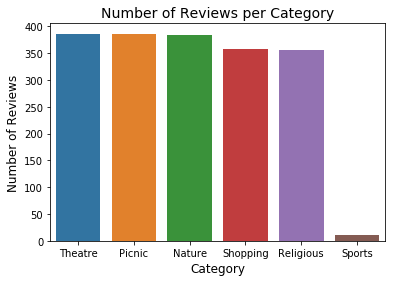

In [6]:
# Create the bar plot of the number of reviews per category
sns.barplot(x = reviews_by_category.index, y= reviews_by_category['Number of Reviews'])
# Set the title and label the axes of the bar plot. 
plt.title('Number of Reviews per Category', fontsize = 14)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12);

#### Question 2: Which Category Did Each User Review the Most?
To answer this questions, I grouped the long-formatted DataFrame by User Id, and then got the maximum number of reviews per each user. <br>
I set a variable idx to hold the index values in the long-formatted DataFrame that had the maximum number of reviews for each user. <br>
Then I got the data for each index and sorted the subset of the DataFrame that had these local-maxima by User Id, so it was in user order. <br>
The DataFrame is returned displaying the category with the greatest number of reviews for each user. <br>
Additionally, a Barplot (created using Seaborn) is displayed with the number of reviews per category by each user, which makes it easy to spot which category had the most reviews per user. <br>
For each user, the category that had the most reviews was:
1. User 1 - Picnic - 95 reviews
2. User 2 - Nature & Theatre (tied) - 76 reviews
3. User 3 - Nature - 97 reviews
4. User 4 - Theatre - 95 reviews
5. User 5 - Religious - 98 reviews

In [7]:
# Group reviews_long data by User Id.
reviews_per_user = reviews_long.groupby("User Id")

In [8]:
# Find location in reviews_long DataFrame with the 
# maximum number of reviews for each user.
idx = reviews_per_user['Number of Reviews'].transform('max') == reviews_long['Number of Reviews']
# Sort the rows containing the maximum number of reviews
# for each user by User Id.
reviews_long[idx].sort_values('User Id')

,User Id,Category,Number of Reviews
25,User 1,Picnic,95
11,User 2,Nature,76
16,User 2,Theatre,76
12,User 3,Nature,97
18,User 4,Theatre,95
9,User 5,Religious,98


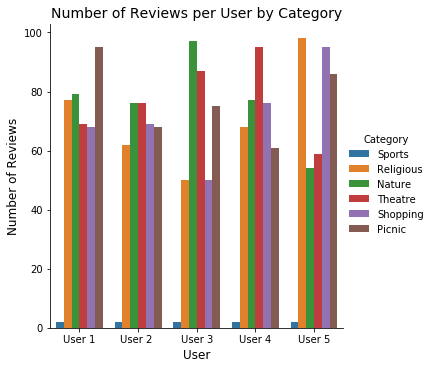

In [9]:
# Create a bar plot of number of reviews per user, for each category.
sns.catplot("User Id", "Number of Reviews", hue="Category", data=reviews_long, kind="bar")
# Set the title and labels for the bar plot.
plt.title('Number of Reviews per User by Category', fontsize = 14)
plt.xlabel('User', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12);

## Dataset #2: Student Test Data for Different Classes
This dataset contains test grades for 4 students in 4 different classes (Physics, Chemistry, English, and Math). <br>

### Data Loading and Tidying
In order to analyze this data, I loaded it in from the csv file I created based on [Evelyn Yoon's discussion post](https://imgur.com/a/Y0RbR5G) in our class forum. <br>
After reading the dataset into a DataFrame object, I then needed to convert the data from wide format to long format, as the data was not tidy. <br>
The data was untidy because the columns were actaully values of a category, and not categories, so I used Pandas' melt function to convert the data from wide to long format. <br>
The resulting DataFrame has three columns: Student, Class (containing the four class category values), and Grade. 

In [10]:
# Read tests per class data into DataFrame.
tests_classes = pd.read_csv('https://raw.githubusercontent.com/ngb0330/DAV-5400/master/Week%2010/Datasets/Student%20Test%20Multiple%20Classes.csv')
# Return the resulting DataFrame.
tests_classes

,Student,Physics,Chemistry,English,Math
0,John,78,79,56,95
1,Alice,58,72,91,81
2,Rachel,22,61,88,64
3,Tom,78,89,56,83


In [11]:
# Combine the Physics, Chemistry, English, and Math
# columns into one Class column
# and create new column Grade to hold the counts 
# from the melted columns.
tests_classes_long = pd.melt(tests_classes, 'Student', value_vars = ['Physics', 'Chemistry', 'English', 'Math'],
                            var_name = 'Class', value_name = 'Grade')
# Return first 5 rows of melted data.
tests_classes_long.head()

,Student,Class,Grade
0,John,Physics,78
1,Alice,Physics,58
2,Rachel,Physics,22
3,Tom,Physics,78
4,John,Chemistry,79


### Analysis of Student Test Data For Different Classes
After tidying the data and converting it to long format, the data is now ready to be analyzed. <br>
There are four questions I wanted to answer based on this data:
1. What is average test score for each class?
2. What is the average test score for each student?
3. What is the highest and lowest score in each class?
4. What is the highest and lowest score for each student?

#### Question 1: Average Test Score for Each Class
To find the average test score for each class, I grouped the long-formatted data by class, and calculated the mean of the grades for each class. <br>
I then sorted the data in descending order and found that the average values for each class were as follows:
1. Math - 80.75
2. Chemistry - 75.25
3. English - 72.75
4. Physics - 59.00


The data is displayed as both a table and a bar plot. <br>

In [12]:
# Group the data by Class and calculate the average Grade for each class.
# Convert the resulting Series to a DataFrame.
average_per_class = tests_classes_long.groupby('Class')['Grade'].mean().to_frame()
# Sort the data by Grade in descending order
average_per_class.sort_values(by = 'Grade', ascending = False, inplace = True)
# Return the sorted DataFrame.
average_per_class

,Grade
Class,
Math,80.75
Chemistry,75.25
English,72.75
Physics,59.00


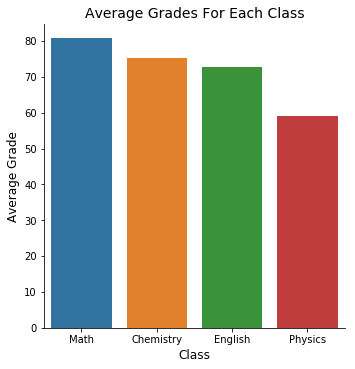

In [13]:
# Create a bar plot of average grade per class.
sns.catplot("Class", "Grade", data = average_per_class.reset_index(), kind = 'bar')
# Set the title and labels for the plot.
plt.title('Average Grades For Each Class', fontsize = 14)
plt.xlabel('Class', fontsize = 12)
plt.ylabel('Average Grade', fontsize = 12);

#### Question 2: Average Test Score for Each Student
To find the average test score for each student, I grouped the long-formatted data by student, and calculated the mean of the grades for each student. <br>
I then sorted the data in descending order and found that the average values for each student were as follows:
1. John - 77.00
2. Tom - 76.50
3. Alice - 75.50
4. Rachel - 58.75


The data is displayed as both a table and a bar plot. <br>

In [14]:
# Group the data by Student and calculated the average Grade for each Student. 
# Convert the resulting Series to a DataFrame.
average_per_student = tests_classes_long.groupby('Student')['Grade'].mean().to_frame()
# Sort the data by Grade in Descending order.
average_per_student.sort_values(by = 'Grade', ascending = False, inplace = True)
# Return the sorted DataFrame.
average_per_student

,Grade
Student,
John,77.00
Tom,76.50
Alice,75.50
Rachel,58.75


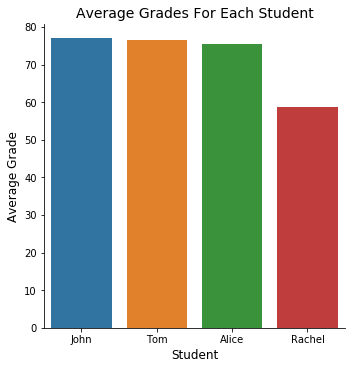

In [15]:
# Create a bar plot of average grade per student.
sns.catplot("Student", "Grade", data = average_per_student.reset_index(), kind = 'bar')
# Set the title and labels for the plot.
plt.title('Average Grades For Each Student', fontsize = 14)
plt.xlabel('Student', fontsize = 12)
plt.ylabel('Average Grade', fontsize = 12);

#### Question 3: Highest and Lowest Score in Each Class
To find the highest and lowert test score in each class, I grouped the long-formatted data by class, and calculated the maximum, minimum, and range  of the grades for each class. <br>
To calculate the range, I defined a function called peak_to_peak which returns the maximum subtracted by the minimum. <br>
I then sorted the data in descending order by high grade and found that the highest and lowest grade in each class were as follows:
1. Math - High: 95, Low: 64
2. English - High: 91, Low: 56
3. Chemistry - High: 89, Low: 61
4. Physics - High: 78, Low: 22

The data is displayed as a table with the range, high, and low scores for each class. <br>

In [16]:
def peak_to_peak (x):
    '''
    The peak_to_peak function takes a Series or DataFrame object and returns the 
    difference between the maximum and minimum values (also known as the Range). 
    Parameter: x - the Series or DataFrame to calculate the Range of.
    Return: the Range of the Series or DataFrame
    '
    '''
    
    return x.max() - x.min()

In [17]:
# Group the tests_classes_long data by Class and calculate the 
# max, min, and peak_to_peak (range) of the Grade for each Class.
range_per_class = tests_classes_long.groupby('Class')['Grade'].agg([peak_to_peak,'max', 'min'])
# Change the names of the columns of the DataFrame.
range_per_class.rename(columns = {'peak_to_peak': 'Range', 'max': 'High', 'min':'Low'}, inplace = True)
# Sort the DataFrame by High, and then Low (if tied), Grade in Descending order
range_per_class.sort_values(by = ['High', 'Low'], ascending = False, inplace = True)
# Return the sorted DataFrame
range_per_class

,Range,High,Low
Class,,,
Math,31,95,64
English,35,91,56
Chemistry,28,89,61
Physics,56,78,22


#### Question 4: Highest and Lowest Score For Each Student
To find the highest and lowert test score for each student, I grouped the long-formatted data by student, and calculated the maximum, minimum, and range  of the grades for each student. <br>
To calculate the range, I used my peak_to_peak function. <br>
I then sorted the data in descending order by high grade and found that the highest and lowest grade for each student were as follows:
1. John - High: 95, Low: 56
2. Alice - High: 91, Low: 58
3. Tom - High: 89, Low: 56
4. Rachel - High: 88, Low: 22

The data is displayed as a table with the range, high, and low scores for each student. <br>

In [18]:
# Group the tests_classes_long data by Student and calculate the 
# max, min, and peak_to_peak (range) of the Grade for each Student.
range_per_student = tests_classes_long.groupby('Student')['Grade'].agg([peak_to_peak,'max', 'min'])
# Change the names of the columns of the DataFrame.
range_per_student.rename(columns = {'peak_to_peak': 'Range', 'max': 'High', 'min':'Low'}, inplace = True)
# Sort the DataFrame by High, and then Low (if tied), Grade in Descending order
range_per_student.sort_values(by = ['High', 'Low'], ascending = False, inplace = True)
# Return the sorted DataFrame
range_per_student

,Range,High,Low
Student,,,
John,39,95,56
Alice,33,91,58
Tom,33,89,56
Rachel,66,88,22


## Dataset #3: Student Test Data for Same Class
This dataset contains test grades for 8 students on 4 different tests (Test 1, Test 2, Test 3, and Test 4). <br>

### Data Loading and Tidying
In order to analyze this data, I loaded it in from the csv file I created based on [my discussion post](https://yu.instructure.com/courses/33553/discussion_topics/42271/entry-127298) in our class forum. <br>
After reading the dataset into a DataFrame object, I then needed to convert the data from wide format to long format, as the data was not tidy. <br>
The data was untidy because the columns were actaully values of a category, and not categories, so I used Pandas' melt function to convert the data from wide to long format. <br>
The resulting DataFrame has three columns: Student, Test Number (containing the four test category values), and Grade. <br>
Additionally, while the data did contain 3 missing values, I chose to treat those values as Numpy's NaN (not a number), and not as zeroes. <br>
I decided to do this because it is possible that these students have not yet taken the exam, or were excused from the exam, and should not therefore be given a zero for the exam, which lower their average. <br>
I therefore did not need to change these values, as when loaded into the DataFrame using Pandas' read_csv function, the missing data was already coded as NaN. <br>

In [19]:
# Read test data from the same class into a DataFrame.
same_class = pd.read_csv('https://raw.githubusercontent.com/ngb0330/DAV-5400/master/Week%2010/Datasets/Student%20Test%20Same%20Class.csv')
# Return the resulting DataFrame.
same_class

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkley,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


In [20]:
# Combine the Test 1, Test 2, Test 3, and Test 4
# columns into one Test Number column
# and create new column Grade to hold the counts 
# from the melted columns.
same_class_long = pd.melt(same_class, 'Name', 
                          value_vars = ['Test 1', 'Test 2', 'Test 3', 'Test 4'],
                         var_name = 'Test Number', value_name = 'Grade')
# Return the first 5 rows of melted data.
same_class_long.head()

,Name,Test Number,Grade
0,Reggie Miller,Test 1,97.0
1,Dan Bonner,Test 1,76.0
2,Steve Smith,Test 1,84.0
3,Charles Barkley,Test 1,NaN
4,Kenny Smith,Test 1,80.0


### Analysis of Student Test Data In the Same Class
After tidying the data and converting it to long format, the data is now ready to be analyzed. <br>
There are three questions I wanted to answer based on this data:
1. Which student had the highest average test grades?
2. Which student had the greatest range of test grades?
3. Which test had the highest grades?

#### Question 1: Student with Highest Average Test Grades
To find the student with the highest average test score, I grouped the long-formatted data by student, and calculated the mean of the grades for each student. <br>
I then sorted the data in descending order and found that the student with the highest average grades was Jim Jackson, with a 93.00 average. <br>

The data is displayed as both a table and a bar plot. <br>

In [21]:
# Group the same_class_long data by Name and calculate the
# average of the Grade for each Name.
# Convert the resulting Series to a DataFrame.
average_per_student = same_class_long.groupby('Name')['Grade'].mean().to_frame()
# Sort the DataFrame by average Grade in desceiding order
average_per_student.sort_values(by = 'Grade', ascending = False, inplace = True)
# Display the first 5 rows of the sorted data
average_per_student.head()

,Grade
Name,
Jim Jackson,93.000000
Reggie Miller,88.750000
Jalen Rose,83.000000
Charles Barkley,82.500000
Steve Smith,81.666667


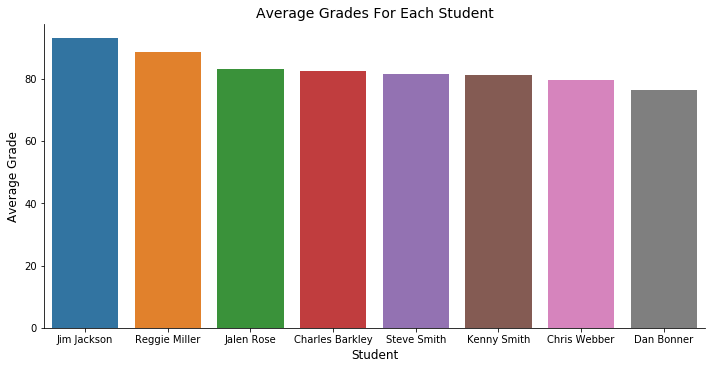

In [22]:
# Create a bar plot of average grade per student
sns.catplot('Name', 'Grade', data = average_per_student.reset_index(), kind = 'bar', aspect = 2)
# Set the title and labels for the plot.
plt.title('Average Grades For Each Student', fontsize = 14)
plt.xlabel('Student', fontsize = 12)
plt.ylabel('Average Grade', fontsize = 12);

#### Question 2: Student with Greatest Range of  Test Grades
To find the student with the greatest range of test scores, I grouped the long-formatted data by student, and calculated the maximum, minimum, and range (using my peak_to_peak function) of the grades for each student. <br>
I then sorted the data in descending order of the range and found that there were two students with the greatest range of test grades: Reggie Miller and Chris Webber, who both had a range of 17.

The data is displayed as both a table and a bar plot. <br>

In [23]:
# Group the same_class_long data by Name and calculate the 
# max, min, and peak_to_peak (range) of the Grade for each Student.
range_per_student = same_class_long.groupby('Name')['Grade'].agg([peak_to_peak, 'max', 'min'])
# Rename the columns of the DataFrame.
range_per_student.rename(columns = {'peak_to_peak': 'Range', 'max': 'High', 'min':'Low'}, inplace = True)
# Sort the DataFrame by Range, and then High score (if tied), of the Grade 
# in descending order
range_per_student.sort_values(by = ['Range', 'High'], ascending = False, inplace = True)
# Return the sorted DataFrame.
range_per_student

,Range,High,Low
Name,,,
Reggie Miller,17.0,97.0,80.0
Chris Webber,17.0,92.0,75.0
Charles Barkley,13.0,89.0,76.0
Dan Bonner,13.0,81.0,68.0
Steve Smith,11.0,86.0,75.0
Kenny Smith,6.0,85.0,79.0
Jalen Rose,5.0,85.0,80.0
Jim Jackson,4.0,95.0,91.0


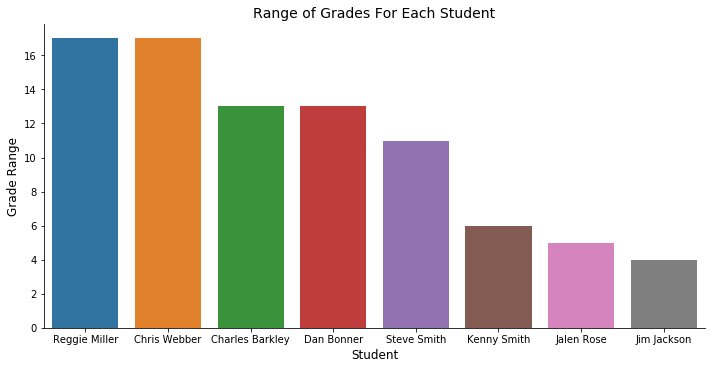

In [24]:
# Create a bar plot of the range of grades per student.
sns.catplot('Name', 'Range', data = range_per_student.reset_index(), kind = 'bar', aspect = 2)
# Set the title and labels for the plot.
plt.title('Range of Grades For Each Student', fontsize = 14)
plt.xlabel('Student', fontsize = 12)
plt.ylabel('Grade Range', fontsize = 12);

#### Question 3: Test with the Highest Grades
To find the test swith the highest grades, I grouped the long-formatted data by test number, and calculated the mean of the grades for each test number. <br>
I decided to use the average test score to decide which test had the highest grades, as that would be more reflective of which test had the highest grades.
I then sorted the data in descending order and found that the test number with the highest average grade was Test 4 with an 86.125 average grade on that test <br>

The data is displayed as both a table and a bar plot. <br>

In [25]:
# Group the same_class_long data by Test Number and
# calculate the average Grade for each Test Number. 
# Convert the resulting Series to a DataFrame.
average_per_test = same_class_long.groupby('Test Number')['Grade'].mean().to_frame()
# Sort the DataFrame by average Grade in descending order.
average_per_test.sort_values(by = 'Grade', ascending = False, inplace = True)
# Return the sorted DataFrame. 
average_per_test

,Grade
Test Number,
Test 4,86.125000
Test 1,83.428571
Test 3,83.333333
Test 2,80.500000


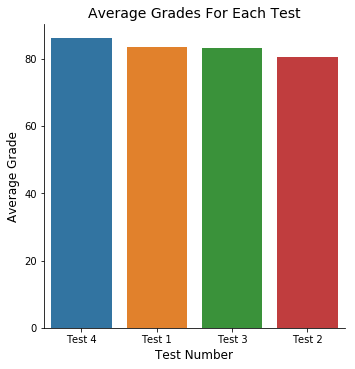

In [26]:
# Create a bar plot of the average grade for each test number.
sns.catplot('Test Number', 'Grade', data = average_per_test.reset_index(), kind = 'bar')
# Set the title and the labels for the bar plot.
plt.title('Average Grades For Each Test', fontsize = 14)
plt.xlabel('Test Number', fontsize = 12)
plt.ylabel('Average Grade', fontsize = 12);